⚡**Project Title:** Analyzing Book Summaries with NLP, Computer Vision.


---

⚡**Introduction:**

> This notebook conducts a comprehensive analysis of a book summary dataset. It encompasses data cleaning, missing value handling, exploratory data analysis, two summarization methods, and the transformation of these summaries into images.

⚡**Key Components:**

**1. Data Preprocessing and Exploratory Data Analysis (EDA):**

>* Extensive **data preprocessing** included tokenization, punctuation and stopwords removal and eliminating extra spaces.
* A **word cloud** visualized the most frequent tokens, revealing prevalent themes.
* A **bar plot** illustrated token frequency, identifying common terms.

**2. NLP Component:**

> * I used two summarization methods: **Spacy library** and **Falconsai/text_summarization model**.
* The Falconsai achieved an impressive Evaluation Rouge Score of 0.95 (F1), condensing the summaries effectively for easier analysis.

**3. Computer Vision Component:**


> For the text-to-image conversion, I utilized the **stabilityai/sd-turbo model**. This model transformed the condensed summaries obtained from the second step into visually interpretable images.

🟡 **Data Preprocessing and Exploratory Data Analysis (EDA):**

**load the data:**

In [ ]:
with open('booksummaries.txt', 'r') as f:
    all_data = []
    data = []
    for i in range(5):
        line = f.readline()
        all_data.append(line)

    for line in all_data:
        print(line)
        info = line.split('\t')
        seq=info[6]
        data.append(seq)
        print(seq)

620	/m/0hhy	Animal Farm	George Orwell	1945-08-17	{"/m/016lj8": "Roman \u00e0 clef", "/m/06nbt": "Satire", "/m/0dwly": "Children's literature", "/m/014dfn": "Speculative fiction", "/m/02xlf": "Fiction"}	 Old Major, the old boar on the Manor Farm, calls the animals on the farm for a meeting, where he compares the humans to parasites and teaches the animals a revolutionary song, 'Beasts of England'. When Major dies, two young pigs, Snowball and Napoleon, assume command and turn his dream into a philosophy. The animals revolt and drive the drunken and irresponsible Mr Jones from the farm, renaming it "Animal Farm". They adopt Seven Commandments of Animal-ism, the most important of which is, "All animals are equal". Snowball attempts to teach the animals reading and writing; food is plentiful, and the farm runs smoothly. The pigs elevate themselves to positions of leadership and set aside special food items, ostensibly for their personal health. Napoleon takes the pups from the farm dogs an

In [ ]:
print('\n'.join(data))

 Old Major, the old boar on the Manor Farm, calls the animals on the farm for a meeting, where he compares the humans to parasites and teaches the animals a revolutionary song, 'Beasts of England'. When Major dies, two young pigs, Snowball and Napoleon, assume command and turn his dream into a philosophy. The animals revolt and drive the drunken and irresponsible Mr Jones from the farm, renaming it "Animal Farm". They adopt Seven Commandments of Animal-ism, the most important of which is, "All animals are equal". Snowball attempts to teach the animals reading and writing; food is plentiful, and the farm runs smoothly. The pigs elevate themselves to positions of leadership and set aside special food items, ostensibly for their personal health. Napoleon takes the pups from the farm dogs and trains them privately. Napoleon and Snowball struggle for leadership. When Snowball announces his plans to build a windmill, Napoleon has his dogs chase Snowball away and declares himself leader. Napo

**Preprocess data:**

**🔺pipline for preprocessing**

In [ ]:
from abc import ABC, abstractmethod
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import words

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
class TextProcessor(ABC):
  """Base class for text processing."""

  @abstractmethod
  def transform(self, text):
    pass

In [ ]:
class TokenizeText(TextProcessor):
  """Tokenizes input text."""

  def transform(self, text):
    tokens = word_tokenize(text.lower())
    return tokens

class RemoveStopwords(TextProcessor):
  """Removes stopwords from input text."""

  def __init__(self, language='english'):
    self.stopwords = set(stopwords.words(language))

  def transform(self, tokens):
    flat_tokens = [token for sublist in tokens for token in sublist]
    # Lowercase the tokens
    flat_tokens = [token.lower() for token in flat_tokens]
    # Remove stopwords
    return [token for token in flat_tokens if token not in self.stopwords]

class RemovePunkt(TextProcessor):
  """Removes punctuation from tokens."""

  def transform(self, tokens):
    return [[''.join(char if char not in string.punctuation else ' ' for char in token) for token in tokens]]

class RemoveSpace(TextProcessor):
  """Removes empty strings from the list of tokens."""

  def transform(self, tokens):
    return [token for token in tokens if token.strip()]

In [ ]:
class TextPipeLine:
  """Pipeline for text processing."""

  def __init__(self, *args):
      self.transformers = args

  def transform(self, text):
      for tf in self.transformers:
          text = tf.transform(text)
      return text

  def __str__(self):
      transformers = ' ---> '.join([tf.__class__.__name__ for tf in self.transformers])
      return f'Pipelines: {transformers}'

In [ ]:
pipe = TextPipeLine(
    TokenizeText(),
    RemovePunkt(),
    RemoveStopwords(),
    RemoveSpace(),
)

In [ ]:
processed_data = []

for text in data:
    processed_text = pipe.transform(text)
    processed_data.append(processed_text)


for line in processed_data:
    print(line)

['old', 'major', 'old', 'boar', 'manor', 'farm', 'calls', 'animals', 'farm', 'meeting', 'compares', 'humans', 'parasites', 'teaches', 'animals', 'revolutionary', 'song', ' beasts', 'england', 'major', 'dies', 'two', 'young', 'pigs', 'snowball', 'napoleon', 'assume', 'command', 'turn', 'dream', 'philosophy', 'animals', 'revolt', 'drive', 'drunken', 'irresponsible', 'mr', 'jones', 'farm', 'renaming', 'animal', 'farm', 'adopt', 'seven', 'commandments', 'animal ism', 'important', 'animals', 'equal', 'snowball', 'attempts', 'teach', 'animals', 'reading', 'writing', 'food', 'plentiful', 'farm', 'runs', 'smoothly', 'pigs', 'elevate', 'positions', 'leadership', 'set', 'aside', 'special', 'food', 'items', 'ostensibly', 'personal', 'health', 'napoleon', 'takes', 'pups', 'farm', 'dogs', 'trains', 'privately', 'napoleon', 'snowball', 'struggle', 'leadership', 'snowball', 'announces', 'plans', 'build', 'windmill', 'napoleon', 'dogs', 'chase', 'snowball', 'away', 'declares', 'leader', 'napoleon', 'e

**🔺 plot word clouds for each line in processed_data:**

In [ ]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
def plot_word_clouds(data):
  """
  Plot word clouds for each line of text data.

    Input:
        data (list): A list of strings where each string represents a line of text.

    Output:
        The plot of word clouds for each line of text data.
  """
  for idx, text in enumerate(data, start=1):
    token_counts = Counter(text)

    # Create Word Cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(token_counts)

    # Plot Word Cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud of Tokens for Line {idx}')
    plt.show()

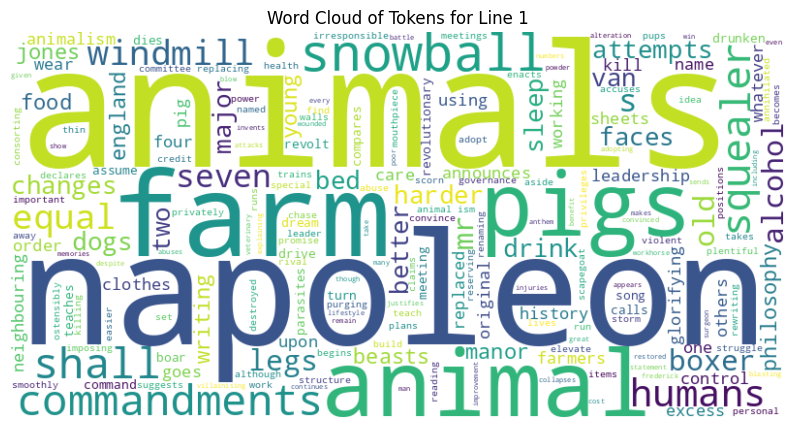

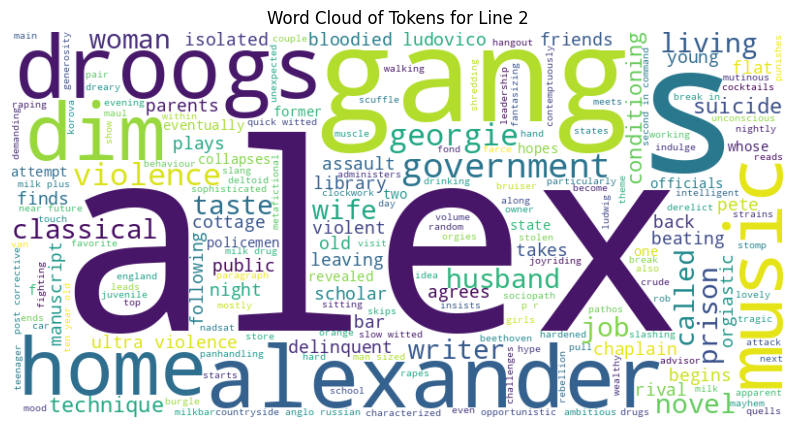

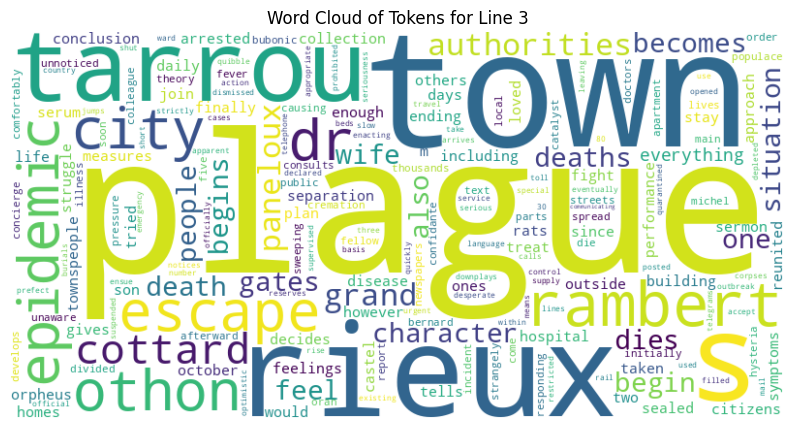

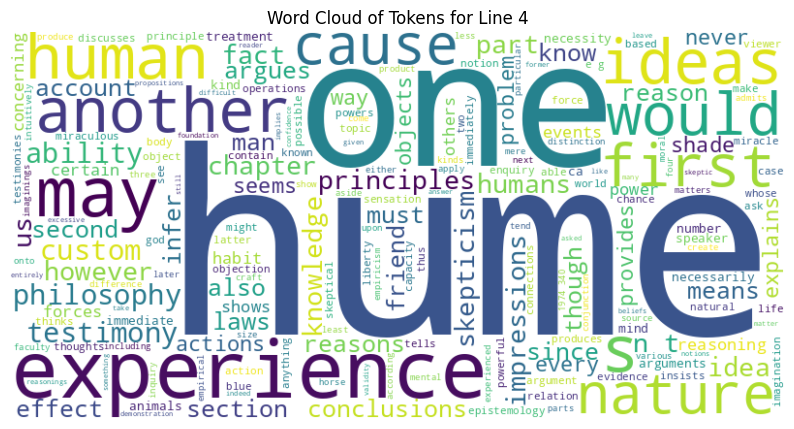

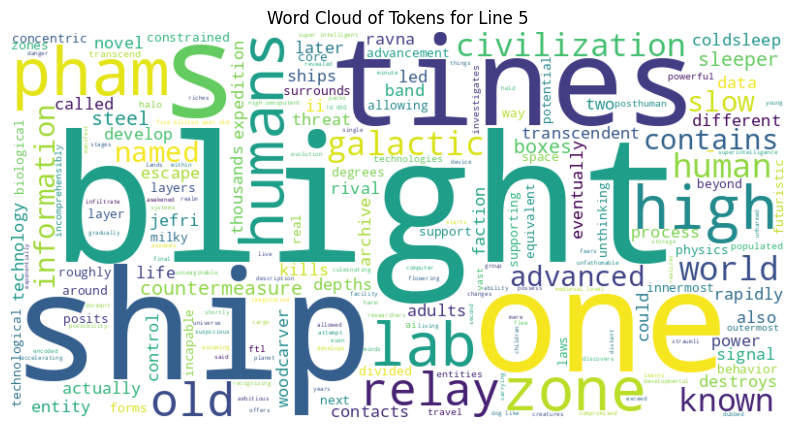

In [ ]:
plot_word_clouds(processed_data)

**🔺 plot bar plot:**

In [ ]:
def plot_top_tokens(data):
  """
  Plot the top N most common tokens for each line of text data.

    Input:
        data (list): A list of strings where each string represents a line of text.

    Output:
        Displays bar plots of the top N most common tokens for each line of text data.
  """
  for idx, text in enumerate(data, start=1):

    token_counts = Counter(text)

    # Plot top N most common tokens
    top_n = 20
    color = ['lightblue', 'blue', 'purple', 'red', 'black']
    top_tokens = dict(token_counts.most_common(top_n))
    plt.figure(figsize=(10, 6))
    plt.bar(top_tokens.keys(), top_tokens.values(), color=color)
    plt.xlabel('Token')
    plt.ylabel('Frequency')
    plt.title('Top {} Most Common Tokens'.format(top_n))
    plt.xticks(rotation=45)
    plt.show()

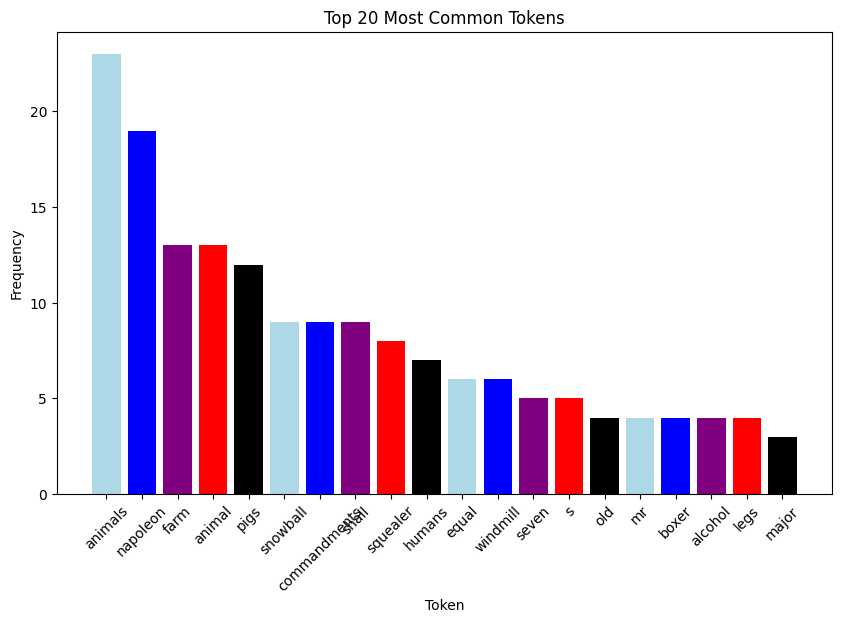

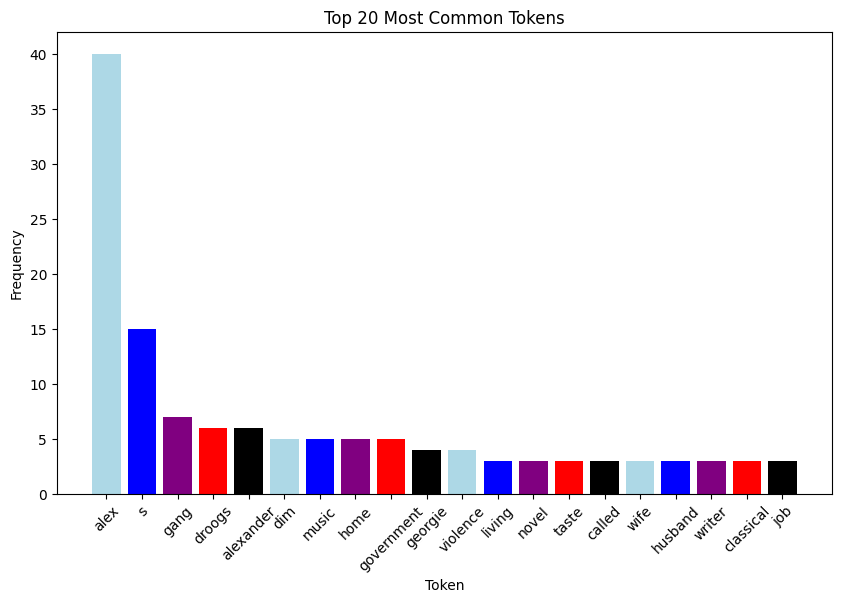

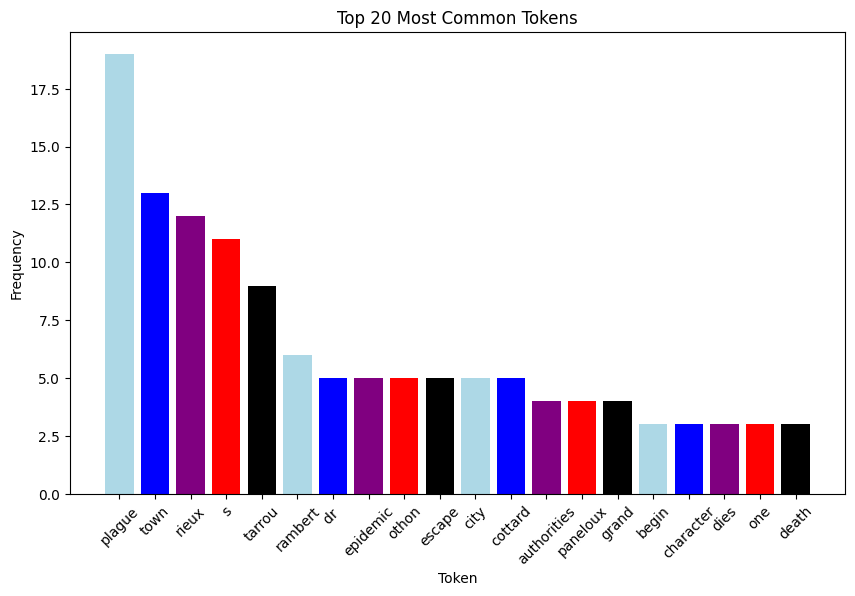

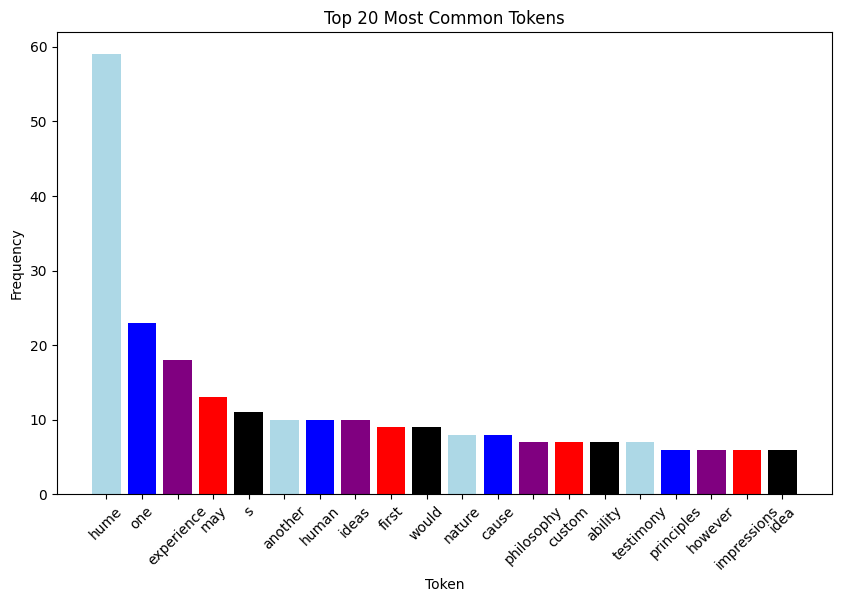

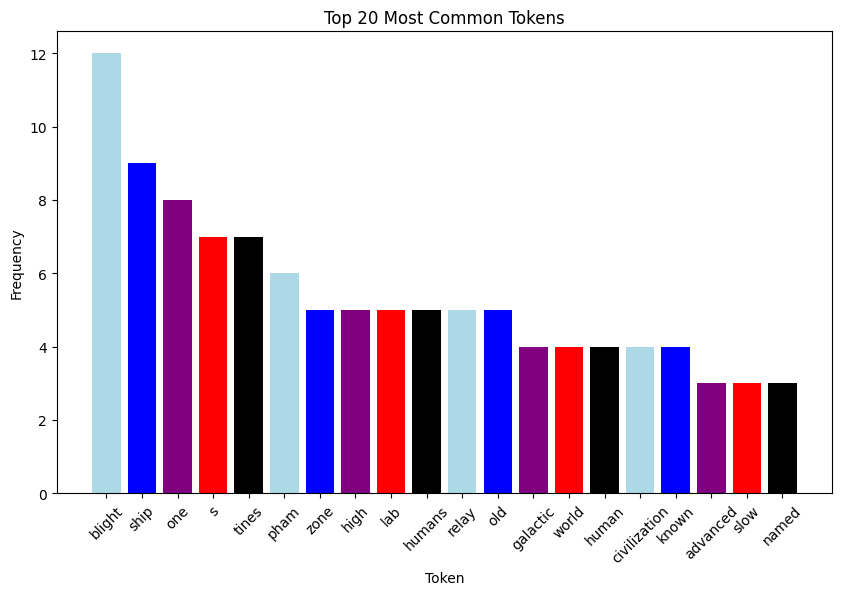

In [ ]:
plot_top_tokens(processed_data)

🟡 **NLP Component:**

🔶**first text sunnarization using the Spacy library:**

!pip install spacy

!python3 -m spacy download en_core_web_lg

!pip install pytextrank

In [ ]:
!pip install spacy

In [ ]:
!python3 -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
!pip install pytextrank

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.5 MB/s eta 0:00:00


In [ ]:
import spacy
import pytextrank

# Load English language model with TextRank extension
nlp = spacy.load("en_core_web_lg")
nlp.add_pipe("textrank")



# Initialize a list to store summaries
summaries = []

# Process each line in data and generate a summary
for idx, line in enumerate(data, start=1):
    # Convert the line into a string
    text = line
    print(f"Original Line {idx} Size:", len(text))

    # Apply TextRank summarization
    doc = nlp(text)

    # Initialize variables to store summary and its length
    summary = ""
    summary_length = 0

    # Generate and print the summary
    for sent in doc._.textrank.summary(limit_phrases=1, limit_sentences=1):
        summary += sent.text + " "
        summary_length += len(sent.text)

    # Print the original text
    print(f"Original Line {idx} Text:")
    print(text)
    print()  # Add a newline for better readability between lines

    # Print the summary
    print(f"Summary for Original Line {idx}:")
    print("Summary:", summary)
    print("Summary Length:", summary_length)
    print()  # Add a newline for better readability between summaries

    # Append the summary to the list
    summaries.append(summary)

/usr/local/lib/python3.10/dist-packages
Original Line 1 Size: 5813
Original Line 1 Text:
 Old Major, the old boar on the Manor Farm, calls the animals on the farm for a meeting, where he compares the humans to parasites and teaches the animals a revolutionary song, 'Beasts of England'. When Major dies, two young pigs, Snowball and Napoleon, assume command and turn his dream into a philosophy. The animals revolt and drive the drunken and irresponsible Mr Jones from the farm, renaming it "Animal Farm". They adopt Seven Commandments of Animal-ism, the most important of which is, "All animals are equal". Snowball attempts to teach the animals reading and writing; food is plentiful, and the farm runs smoothly. The pigs elevate themselves to positions of leadership and set aside special food items, ostensibly for their personal health. Napoleon takes the pups from the farm dogs and trains them privately. Napoleon and Snowball struggle for leadership. When Snowball announces his plans to buil

In [ ]:
print('\n'.join(summaries))

Once Snowball becomes a scapegoat, Napoleon begins purging the farm with his dogs, killing animals he accuses of consorting with his old rival. 
 Alex, a teenager living in near-future England, leads his gang on nightly orgies of opportunistic, random "ultra-violence." 
When the daily number of deaths jumps to 30, the town is sealed and an outbreak of plague is officially declared. 
After expounding his epistemology, Hume explains how to apply his principles to specific topics. 
The expedition's facility, called High Lab, is gradually compromised by a dormant super-intelligent entity (actually encoded within the archive) later known as the Blight. 


**🔶 calculate rouge scores for Summaries:**

!pip install rouge

In [ ]:
!pip install rouge


In [ ]:
import sys
sys.setrecursionlimit(10000)

from rouge import Rouge

rouge = Rouge()

# Calculate ROUGE scores for each summary
for idx, summary in enumerate(summaries, start=1):
    scores = rouge.get_scores(summary, data[idx-1])  # Get scores for each summary against its corresponding reference summary
    print(f"ROUGE scores for Summary {idx}:", scores)

ROUGE scores for Summary 1: [{'rouge-1': {'r': 0.04700854700854701, 'p': 1.0, 'f': 0.0897959175097043}, 'rouge-2': {'r': 0.025830258302583026, 'p': 0.9545454545454546, 'f': 0.0502994006845423}, 'rouge-l': {'r': 0.04700854700854701, 'p': 1.0, 'f': 0.0897959175097043}}]
ROUGE scores for Summary 2: [{'rouge-1': {'r': 0.033582089552238806, 'p': 1.0, 'f': 0.06498194882977754}, 'rouge-2': {'r': 0.01818181818181818, 'p': 1.0, 'f': 0.035714285363520414}, 'rouge-l': {'r': 0.033582089552238806, 'p': 1.0, 'f': 0.06498194882977754}}]
ROUGE scores for Summary 3: [{'rouge-1': {'r': 0.03374777975133215, 'p': 1.0, 'f': 0.0652920955883256}, 'rouge-2': {'r': 0.019782393669634024, 'p': 0.9523809523809523, 'f': 0.03875968952378538}, 'rouge-l': {'r': 0.03374777975133215, 'p': 1.0, 'f': 0.0652920955883256}}]
ROUGE scores for Summary 4: [{'rouge-1': {'r': 0.0111731843575419, 'p': 0.9230769230769231, 'f': 0.02207911659899676}, 'rouge-2': {'r': 0.0053475935828877, 'p': 0.9285714285714286, 'f': 0.01063394671640

🔶 **second summarization using  Falconsai/text_summarization model:**

In [ ]:
from transformers import pipeline

# Initialize the summarization pipeline
summarizer = pipeline("summarization", model="Falconsai/text_summarization")

# Read data from file and summarize each line separately
summary_list = []
for line in data:
  summary = summarizer(line, max_length=1000, min_length=30, do_sample=False)
  summary_list.append(summary[0]['summary_text'])

# Print the list of summaries
for summary in summary_list:
  print(summary)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.49k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (1360 > 512). Running this sequence through the model will result in indexing errors


Napoleon and Squealer adopt Seven Commandments of Animalism . When Major dies, two young pigs assume command and turn his dream into a philosophy . The animals revolt and drive Mr Jones from the farm, renaming it "Animal Farm"
Alex, a teenager living in near-future England, leads his gang on nightly orgies of opportunistic, random "ultra-violence" Dim, an ambitious second-in-command, and Pete, who mostly plays along as the droogs indulge their taste for ultraviolence . In a metafictional touch, Alex is a writer working on a manuscript called "A Clockwork Orange"
In the town of Oran, thousands of rats begin to die in the streets . A hysteria develops soon afterward, causing the local newspapers to report the incident . The main character, Dr. Bernard Rieux, lives comfortably in an apartment building when strangely the concierge, M. Michel, a confidante, dies from a fever .
(Hume 1974:340) The first section of the last chapter is organized as an outline of various skeptical arguments . I

In [ ]:
print('\n'.join(summary_list))

Napoleon and Squealer adopt Seven Commandments of Animalism . When Major dies, two young pigs assume command and turn his dream into a philosophy . The animals revolt and drive Mr Jones from the farm, renaming it "Animal Farm"
Alex, a teenager living in near-future England, leads his gang on nightly orgies of opportunistic, random "ultra-violence" Dim, an ambitious second-in-command, and Pete, who mostly plays along as the droogs indulge their taste for ultraviolence . In a metafictional touch, Alex is a writer working on a manuscript called "A Clockwork Orange"
In the town of Oran, thousands of rats begin to die in the streets . A hysteria develops soon afterward, causing the local newspapers to report the incident . The main character, Dr. Bernard Rieux, lives comfortably in an apartment building when strangely the concierge, M. Michel, a confidante, dies from a fever .
(Hume 1974:340) The first section of the last chapter is organized as an outline of various skeptical arguments . I

🟡 **Computer Vision Component:**

!pip install diffusers --upgrade

!pip install invisible_watermark transformers accelerate safetensors

!pip install diffusers transformers accelerate --upgrade

In [ ]:
!pip install diffusers --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 7.4 MB/s eta 0:00:00


In [ ]:
!pip install invisible_watermark transformers accelerate safetensors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 31.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinu

In [ ]:
!pip install diffusers transformers accelerate --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 21.7 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.40.0
    Uninstalling transformers-4.40.0:
      Successfully uninstalled transformers-4.40.0


**🔶 convert text to image using summary_list that geberated by Falconsai/text_summarization model:**

model_index.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/618 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.87k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/574 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/655 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/681M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/1.73G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


Generating image for Summary 1:
Summary: Napoleon and Squealer adopt Seven Commandments of Animalism . When Major dies, two young pigs assume command and turn his dream into a philosophy . The animals revolt and drive Mr Jones from the farm, renaming it "Animal Farm"



  0%|          | 0/1 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (79 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['orange "']


Generating image for Summary 2:
Summary: Alex, a teenager living in near-future England, leads his gang on nightly orgies of opportunistic, random "ultra-violence" Dim, an ambitious second-in-command, and Pete, who mostly plays along as the droogs indulge their taste for ultraviolence . In a metafictional touch, Alex is a writer working on a manuscript called "A Clockwork Orange"



  0%|          | 0/1 [00:00<?, ?it/s]

Generating image for Summary 3:
Summary: In the town of Oran, thousands of rats begin to die in the streets . A hysteria develops soon afterward, causing the local newspapers to report the incident . The main character, Dr. Bernard Rieux, lives comfortably in an apartment building when strangely the concierge, M. Michel, a confidante, dies from a fever .



  0%|          | 0/1 [00:00<?, ?it/s]

Generating image for Summary 4:
Summary: (Hume 1974:340) The first section of the last chapter is organized as an outline of various skeptical arguments . In this chapter, Hume discusses the distinction between impressions and ideas . Hume says that there are at least three kinds of associations between ideas, such as resemblance, and contiguity .



  0%|          | 0/1 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['- year - old data archive.']


Generating image for Summary 5:
Summary: The novel posits that space around the Milky Way is divided into concentric layers called Zones . The innermost, the "Unthinking Depths", surrounds the galactic core and is incapable of supporting advanced life forms at all . Further out, the zone named the "Beyond" can support futuristic technologies such as AI and FTL travel . A human expedition investigates a five-billion-year-old data archive .



  0%|          | 0/1 [00:00<?, ?it/s]

Displaying Generated Images:
Image 1:


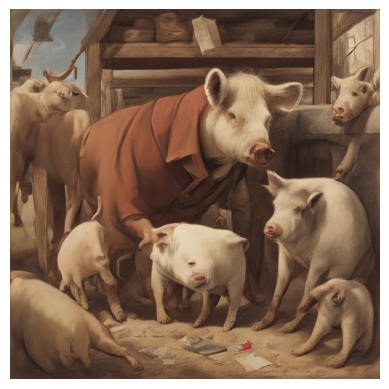

Image 2:


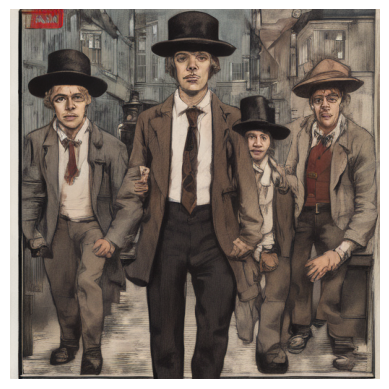

Image 3:


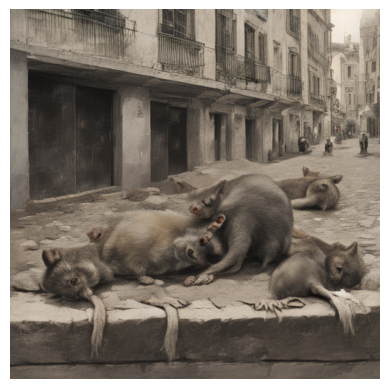

Image 4:


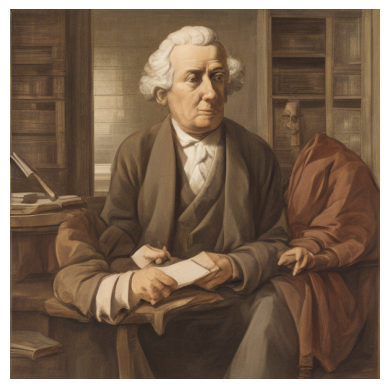

Image 5:


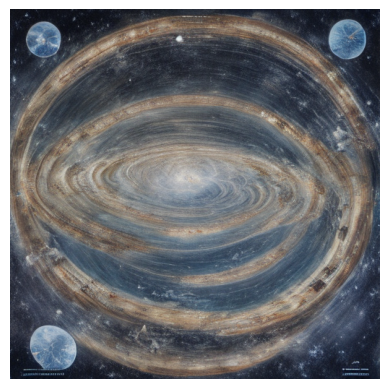

In [ ]:
from diffusers import AutoPipelineForText2Image
import torch
import matplotlib.pyplot as plt

# Load the model
pipe = AutoPipelineForText2Image.from_pretrained("stabilityai/sd-turbo", torch_dtype=torch.float16, variant="fp16")
pipe.to("cuda")

generated_images = []

# Loop through each summary and generate an image for it
for idx, summary in enumerate(summary_list, start=1):
    print(f"Generating image for Summary {idx}:")
    print("Summary:", summary)
    print()  # Add a newline for better readability

    # Generate image based on the summary
    image = pipe(prompt=summary, num_inference_steps=1, guidance_scale=0.0).images[0]
    generated_images.append(image)

# Display the generated images
print("Displaying Generated Images:")
for idx, image in enumerate(generated_images, start=1):
    print(f"Image {idx}:")
    plt.imshow(image)
    plt.axis("off")
    plt.show()

**🔶 convert text to image using summaries that generated by the Spacy library:**

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


Generating image for Summary 1:
Summary: Once Snowball becomes a scapegoat, Napoleon begins purging the farm with his dogs, killing animals he accuses of consorting with his old rival. 



  0%|          | 0/1 [00:00<?, ?it/s]

Generating image for Summary 2:
Summary:  Alex, a teenager living in near-future England, leads his gang on nightly orgies of opportunistic, random "ultra-violence." 



  0%|          | 0/1 [00:00<?, ?it/s]

Generating image for Summary 3:
Summary: When the daily number of deaths jumps to 30, the town is sealed and an outbreak of plague is officially declared. 



  0%|          | 0/1 [00:00<?, ?it/s]

Generating image for Summary 4:
Summary: After expounding his epistemology, Hume explains how to apply his principles to specific topics. 



  0%|          | 0/1 [00:00<?, ?it/s]

Generating image for Summary 5:
Summary: The expedition's facility, called High Lab, is gradually compromised by a dormant super-intelligent entity (actually encoded within the archive) later known as the Blight. 



  0%|          | 0/1 [00:00<?, ?it/s]

Displaying Generated Images:
Image 1:


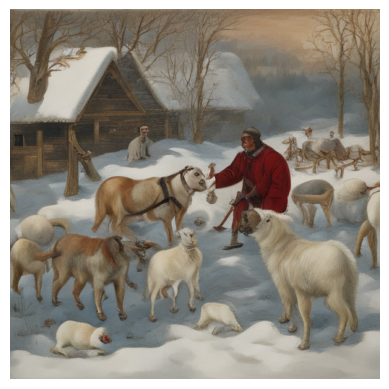

Image 2:


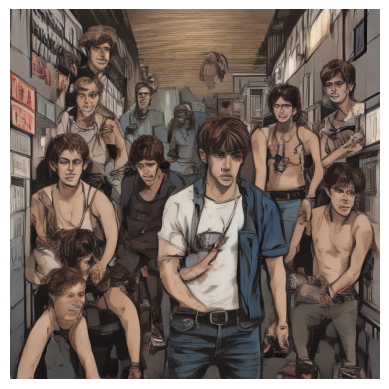

Image 3:


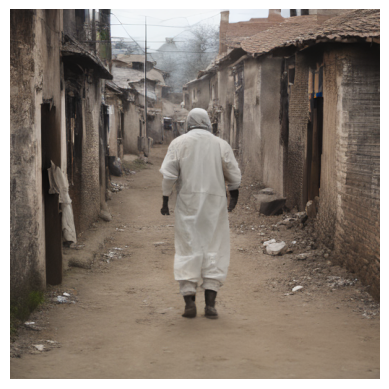

Image 4:


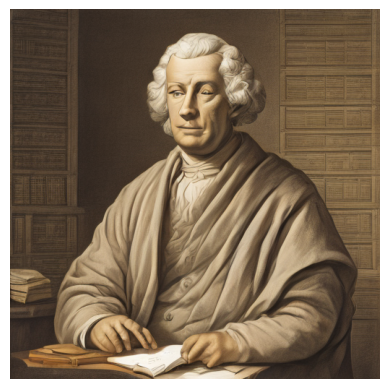

Image 5:


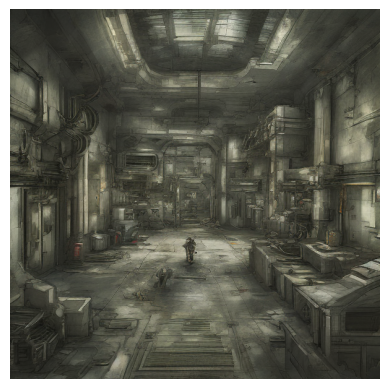

In [ ]:
from diffusers import AutoPipelineForText2Image
import torch
import matplotlib.pyplot as plt

# Load the model
pipe = AutoPipelineForText2Image.from_pretrained("stabilityai/sd-turbo", torch_dtype=torch.float16, variant="fp16")
pipe.to("cuda")

generated_images = []

# Loop through each summary and generate an image for it
for idx, summary in enumerate(summaries, start=1):
    print(f"Generating image for Summary {idx}:")
    print("Summary:", summary)
    print()  # Add a newline for better readability

    # Generate image based on the summary
    image = pipe(prompt=summary, num_inference_steps=1, guidance_scale=0.0).images[0]
    generated_images.append(image)

# Display the generated images
print("Displaying Generated Images:")
for idx, image in enumerate(generated_images, start=1):
    print(f"Image {idx}:")
    plt.imshow(image)
    plt.axis("off")
    plt.show()